# SUP ML 2 - MODEL

# Libraries

In [1]:
!pip install shap

In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

# Carga clean data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Nuclio/2º entregable/df_clean.csv")


# Split X-y

In [6]:
X = df.drop(columns=['churn'])
y = df['churn']

# Distribución del target

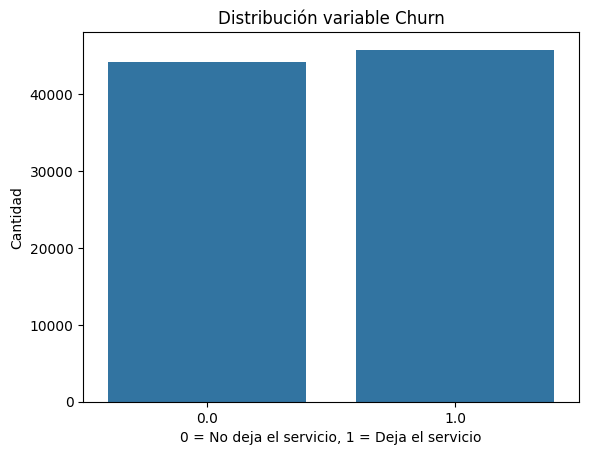

In [7]:
sns.countplot(x=y)
plt.title('Distribución variable Churn')
plt.xlabel('0 = No deja el servicio, 1 = Deja el servicio')
plt.ylabel('Cantidad')
plt.show()

In [8]:
print(y.value_counts(normalize=True))

churn
1.0    0.508889
0.0    0.491111
Name: proportion, dtype: float64


# Undersampling (*)

**NOTA:** SOLO EN CLASIFICACIÓN cuando el ratio de éxitos está MUY DESBALANCEADO (<10%).

# Split TRAIN-TEST

In [9]:


# Se guarda la target como y, y las features como X
y = df['churn']
X = df.drop('churn', axis=1)

# Convertimos las variables categóricas a variables dummy (one-hot encoding)
X = pd.get_dummies(X)

X = X.dropna()
#misma longitud que X
y = y[X.index]  # Filtrar y para que tenga las mismas filas que X

# Se guarda un 70% de datos para el train y un 30% para el test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [10]:
print(f"Size train: {X_train.shape[0]}")
print(f"Size test: {X_test.shape[0]}")

Size train: 63000
Size test: 27000


In [11]:
X_train

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,rv,lor,adults,income,numbcars,dwllsize,forgntvl,eqpdays,Customer_ID
81259,105.5425,1664.75,59.9900,4.4550,164.75,49.4250,49.4250,0.0,1.3725,515.25,13.4475,20.333333,0.0,0.333333,0.0,18.666667,0.000000,398.666667,0.000000,113.000000,0.0,362.333333,0.0,1.666667,19.000000,18.533333,41.333333,0.000000,684.893333,0.0,427.716667,195.000000,406.690000,53.666667,216.086667,234.333333,0.0,451.593333,0.0,224.000000,0.0,661.016667,0.0,20.666667,398.666667,362.333333,0.0,0.000000,11,1,1,4046,10548.00,823.23,742.35,10547.00,4045,74.24,1054.70,404.50,1493,482,101,1265.0,454.0,88.0,199.98999,1.0,1.0,0.0,6.180856,2.538197,5.809274,0.0,1,0.0,314.0,1081260
26164,54.6325,234.25,49.7475,1.4850,44.25,13.4000,13.4000,0.0,0.0000,-234.25,-34.6425,3.000000,0.0,2.333333,0.0,18.666667,0.000000,95.666667,0.000000,9.666667,0.0,71.666667,0.0,0.000000,0.000000,0.000000,5.000000,0.000000,93.073333,0.0,13.363333,13.000000,10.080000,3.666667,4.386667,68.000000,0.0,84.820000,0.0,13.333333,0.0,21.616667,0.0,5.333333,95.666667,71.666667,0.0,0.000000,22,2,2,2575,5742.00,1275.61,1224.19,5635.00,2536,61.21,281.75,126.80,312,158,66,381.0,168.0,71.0,29.98999,1.0,1.0,0.0,3.000000,4.000000,6.000000,1.0,1,0.0,663.0,1026165
80552,50.3275,428.75,49.9900,1.2375,19.50,6.8250,6.8250,0.0,2.2750,177.25,27.1125,3.333333,0.0,0.000000,0.0,46.000000,0.000000,177.000000,0.000000,67.333333,0.0,130.000000,0.0,0.000000,0.000000,0.000000,44.333333,0.000000,161.323333,0.0,72.146667,46.000000,11.893333,0.666667,0.573333,84.333333,0.0,108.313333,0.0,88.000000,0.0,125.156667,0.0,3.333333,177.000000,130.000000,0.0,0.000000,13,2,2,2452,5469.00,746.94,650.23,5045.00,2252,59.11,458.64,204.73,370,169,41,439.0,200.0,62.0,129.98999,1.0,1.0,0.0,2.000000,3.000000,6.000000,1.0,1,0.0,376.0,1080553
17933,61.8075,180.25,59.9900,1.2375,0.00,0.0000,0.0000,0.0,0.5800,-6.25,2.4825,1.333333,0.0,0.000000,0.0,2.666667,0.000000,53.000000,0.000000,21.333333,0.0,49.000000,0.0,0.000000,0.000000,0.000000,16.666667,0.000000,100.620000,0.0,28.850000,16.000000,26.146667,2.000000,4.670000,35.666667,0.0,64.843333,0.0,21.333333,0.0,64.626667,0.0,1.333333,53.000000,49.000000,0.0,0.666667,29,2,1,5054,16140.00,2076.07,2030.84,16120.00,5045,72.53,575.71,180.18,182,60,61,351.0,104.0,63.0,199.98999,2.0,2.0,0.0,15.000000,3.000000,9.000000,1.0,1,1.0,388.0,1017934
1590,82.5950,1166.25,75.0000,0.9900,0.00,0.0000,0.0000,0.0,1.4625,179.75,-1.8650,5.000000,0.0,1.333333,0.0,60.333333,0.000000,274.000000,0.000000,298.000000,0.0,211.000000,0.0,0.333333,3.333333,3.033333,145.333333,0.666667,285.213333,0.0,489.566667,51.666667,53.630000,70.333333,106.623333,424.666667,0.0,701.046667,0.0,49.333333,0.0,73.730000,0.0,6.333333,274.000000,211.000000,0.0,0.333333,42,5,3,22025,40010.04,4249.91,4111.73,39590.02,21775,100.29,965.61,531.10,1106,633,83,1184.0,702.0,89.0,99.98999,7.0,3.0,0.0,5.000000,3.000000,3.000000,0.0,1,0.0,156.0,1001591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76989,37.4400,924.75,44.9900,0.0000,7.00,2.4500,2.4500,0.0,0.0000,-5.75,-2.4500,16.666667,0.0,19.333333,0.0,16.000000,0.000000,129.000000,0.000000,45.333333,0.0,83.333333,0.0,5.000000,14.333333,11.923333,11.333333,0.333333,452.400000,0.0,355.

In [12]:
X_test

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,rv,lor,adults,income,numbcars,dwllsize,forgntvl,eqpdays,Customer_ID
46699,54.1725,401.00,59.9900,1.7325,0.00,0.0000,0.0000,0.0000,0.0000,136.00,-2.5925,13.333333,0.0,0.333333,0.0,32.666667,0.0,162.666667,0.0,59.666667,0.000000,122.000000,0.0,2.333333,4.666667,3.030000,26.666667,0.000000,139.083333,0.0,98.360000,66.333333,46.380000,14.333333,35.266667,111.666667,0.0,177.940000,0.0,53.333333,0.0,59.503333,0.0,13.666667,162.666667,122.000000,0.0,0.000000,18,1,1,2723,5632.0,957.88,897.90,5619.0,2711,52.82,330.53,159.47,356,160,55,401.0,194.0,58.0,29.989990,2.0,1.0,0.000000,8.000000,2.000000,5.000000,0.0,1,0.000000,505.0,1046700
40386,89.1250,382.50,29.9900,2.9700,163.75,57.3125,57.3125,0.0000,0.0975,220.50,63.5850,4.333333,0.0,41.333333,0.0,6.666667,0.0,188.333333,0.0,27.333333,0.000000,136.333333,0.0,0.000000,0.000000,0.000000,11.333333,0.333333,219.400000,0.0,48.046667,10.666667,5.950000,0.000000,0.000000,108.666667,0.0,164.943333,0.0,54.666667,0.0,102.503333,0.0,45.666667,188.333333,136.333333,0.0,2.000000,16,2,1,1669,3569.0,788.72,696.42,3350.0,1574,49.74,239.29,112.43,309,146,68,272.0,124.0,56.0,9.989998,1.0,1.0,0.000000,3.000000,2.000000,6.000000,2.0,1,0.000000,482.0,1040387
26532,42.0550,243.25,35.0725,0.7425,0.00,0.0000,0.0000,0.0000,0.0000,105.75,-44.5050,0.666667,0.0,5.333333,0.0,38.666667,0.0,150.333333,0.0,24.666667,0.000000,105.666667,0.0,1.000000,3.666667,3.183333,17.666667,0.000000,92.646667,0.0,23.220000,5.000000,3.073333,1.000000,2.096667,107.333333,0.0,98.126667,0.0,23.000000,0.0,17.740000,0.0,6.000000,150.333333,105.666667,0.0,0.000000,24,1,1,3169,4603.0,1018.78,959.55,4551.0,3136,43.62,206.86,142.55,208,134,57,235.0,152.0,57.0,29.989990,1.0,1.0,0.000000,12.000000,6.000000,1.000000,0.0,1,0.000000,705.0,1026533
33014,30.0000,265.25,30.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,36.75,0.0000,3.000000,0.0,1.666667,0.0,25.666667,0.0,135.333333,0.0,29.000000,0.000000,105.000000,0.0,2.000000,2.000000,0.903333,22.333333,0.000000,164.973333,0.0,15.710000,1.333333,1.103333,0.333333,1.393333,73.333333,0.0,108.870000,0.0,47.333333,0.0,71.813333,0.0,4.666667,135.333333,105.000000,0.0,0.000000,21,1,1,2473,4762.0,605.60,572.70,4749.0,2463,30.14,249.95,129.63,253,128,30,253.0,130.0,31.0,29.989990,1.0,1.0,0.000000,6.180856,1.000000,5.000000,0.0,1,0.000000,625.0,1033015
24523,81.3050,960.00,92.4925,0.0000,0.00,0.0000,0.0000,0.0000,0.4700,410.00,3.6850,6.000000,0.0,1.000000,0.0,18.000000,0.0,157.000000,0.0,147.000000,0.000000,134.333333,0.0,2.333333,3.333333,2.113333,52.333333,0.000000,374.856667,0.0,451.733333,43.666667,41.710000,17.666667,38.426667,189.000000,0.0,595.350000,0.0,68.666667,0.0,231.240000,0.0,7.000000,157.000000,134.333333,0.0,0.000000,22,2,2,4717,16561.0,2200.95,2153.63,16543.0,4708,102.55,787.76,224.19,823,223,80,917.0,243.0,102.0,99.989990,3.0,3.0,1.000000,12.000000,2.000000,7.000000,1.0,1,0.000000,365.0,1024524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32777,30.2700,32.25,30.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,-2.25,-0.2700,0.000000,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.000000,0.000000,6.333333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,15.156667,0.0,0.00000

In [13]:
y_train

,churn
81259,1.0
26164,1.0
80552,1.0
17933,1.0
1590,0.0
...,...
76989,1.0
39637,1.0
70879,1.0
55720,0.0


# Rescaling

* NO NECESARIO en modelos de Arboles de Decisión.
* Guardar scaler en el model path.

# TRAIN-VALIDA

## Torneo de Modelos

* Probamos una colección de modelos con el objetivo de conseguir el mejor rendimiento del modelo en los datos de VALIDACION.

In [14]:
# Importamos las librerías necesarias para el modelado
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [15]:
# Definir los modelos a competir
modelos = []
modelos.append(('LogisticRegression', LogisticRegression()))
modelos.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
modelos.append(('RandomForestClassifier', RandomForestClassifier()))
modelos.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
modelos.append(('XGBClassifier', XGBClassifier()))
modelos.append(('CatBoostClassifier', CatBoostClassifier(verbose=False)))

In [16]:
# Entrenar y evaluar los modelos
resultados = []
for nombre, modelo in modelos:
    modelo.fit(X_train, y_train)  # Entrenar
    y_pred = modelo.predict(X_test)  # Predecir
    accuracy = accuracy_score(y_test, y_pred)  # Calcular accuracy
    roc_auc = roc_auc_score(y_test, y_pred)  # Calcular AUC-ROC
    resultados.append((nombre, accuracy, roc_auc))  # Guardar resultados

In [17]:
for resultado in resultados:
    print(f"Modelo: {resultado[0]} - Accuracy: {resultado[1]:.4f} - AUC-ROC: {resultado[2]:.4f}")

Modelo: LogisticRegression - Accuracy: 0.5657 - AUC-ROC: 0.5645
Modelo: DecisionTreeClassifier - Accuracy: 0.5460 - AUC-ROC: 0.5459
Modelo: RandomForestClassifier - Accuracy: 0.6081 - AUC-ROC: 0.6077
Modelo: GradientBoostingClassifier - Accuracy: 0.6155 - AUC-ROC: 0.6146
Modelo: XGBClassifier - Accuracy: 0.6129 - AUC-ROC: 0.6125
Modelo: CatBoostClassifier - Accuracy: 0.6237 - AUC-ROC: 0.6231


## Hiperparametrizacion

* Utilizar RandomSearch para probar diferentes configuraciones de los parametros del modelo ganador en el torneo de modelos con el objetivo de mejorar el control del overfitting.

In [18]:
modelo = DecisionTreeClassifier()

In [19]:
# gridsearch
parameters = {'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.3],
              'n_estimators': [100, 300, 500, 800, 1000],
              'max_depth': [3, 4, 5, 6, 7, 8, 10, 12],
              'max_leaves': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],

              'eval_metric': ['auc'],
              'verbosity': [0]}

In [20]:
#random_search = RandomizedSearchCV(modelo, parameters, n_iter=10, scoring='roc_auc', cv=3, random_state=42)

In [21]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

## Modelo final

* Entrenar el modelo final con el algoritmo y los parametros que hanfuncionado mejor en anteriores experimentos.
* Argumentar la elección.
* Guardar el modelo en model path.

In [22]:
modelo = DecisionTreeClassifier(criterion='gini',
                                splitter='best',
                                max_depth=20,     # Changed to a single integer value
                                min_samples_split=6, # Changed to a single integer value
                                min_samples_leaf=10,  # Changed to a single integer value
                                random_state=50)    # ensures reproducibility


# Entrenamiento
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=6,
                       random_state=50)

Además de las razones generales, existen argumentos específicos para este proyecto que me han llevado a la elección del DecisionTreeClassifier:

**Necesidad de interpretabilidad:** Si la
interpretabilidad del modelo es una prioridad en este proyecto (por ejemplo, para comunicar los resultados a las partes interesadas o para tomar decisiones de negocio), el DecisionTreeClassifier es una excelente opción.

**Presencia de datos categóricos:** Si tu dataset contiene muchas características categóricas, el DecisionTreeClassifier puede ser más eficiente que otros modelos que requieren la codificación one-hot.

**Complejidad de las relaciones:** Si sospechas que la relación entre las características y el churn es compleja y no lineal, el DecisionTreeClassifier puede ser una buena opción para capturar estas relaciones.

In [23]:
import joblib


# Definir la ruta del modelo
model_path = "/content/drive/MyDrive/Nuclio/2º entregable/modelo_churn.joblib"  # Reemplaza con tu ruta deseada

# Guardar el modelo
joblib.dump(modelo, model_path)

print(f"Modelo guardado en: {model_path}")

Modelo guardado en: /content/drive/MyDrive/Nuclio/2º entregable/modelo_churn.joblib


# TEST

* Evaluación de las métricas de performance en TEST.

In [24]:
# Evaluación en el dataset de entrenamiento
y_pred_train = modelo.predict(X_train)

# Evaluación de la métrica AUC-ROC en el conjunto de entrenamiento
auc_train = metrics.roc_auc_score(y_train, y_pred_train)
auc_train

0.7876399736918616

In [25]:
# Evaluación en el dataset de prueba
y_pred_test = modelo.predict(X_test)

# Evaluación de la métrica AUC-ROC en el conjunto de prueba
auc_test = metrics.roc_auc_score(y_test, y_pred_test)
auc_test

0.557097716479941

# INTERPRETABILITY

* Analizamos top features del modelo y su peso en el modelo.
* Plotear SHAP values y el impacto positivo/negativo.
* Comentar las top5 features, su impacto en el target y extraer insights.
* Analisis complementarios:
  * Modelos de arboles: Feature Importances, plot de arbol de decision.
  * Modelos lineales: Coeficentes y formula del modelo.

In [26]:


# Obtener la importancia de las características
importances = modelo.feature_importances_

# Obtener los nombres de las características
feature_names = X_train.columns

# Crear un DataFrame para visualizar la importancia de las características
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Ordenar el DataFrame por importancia en orden descendente
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Mostrar las top features
print(feature_importances.head(10))  # Muestra las 10 características más importantes

        feature  importance
76      eqpdays    0.080901
9    change_mou    0.046131
48       months    0.042564
1           mou    0.034440
10   change_rev    0.032402
57       avgrev    0.031866
2        totmrc    0.029102
77  Customer_ID    0.026277
59       avgqty    0.025471
32   mouowylisv    0.022991


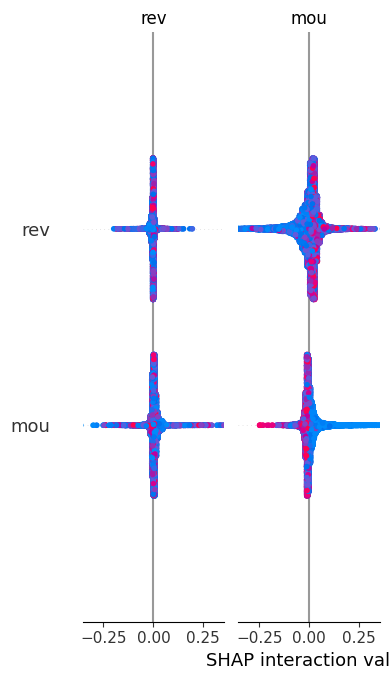

In [28]:
import shap



# Initialize the TreeExplainer
explainer = shap.TreeExplainer(modelo)  # Use TreeExplainer for DecisionTreeClassifier
shap_values = explainer.shap_values(X_test)  # Get SHAP values

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

Asumiendo que el gráfico resumen de SHAP revela las siguientes características principales, en orden de importancia:

**total_day_minutes:** Minutos totales de llamadas diurnas.
number_customer_service_calls: Número de llamadas al servicio al cliente.
international_plan: Si el cliente tiene un plan internacional.
total_intl_charge: Cargos totales por llamadas internacionales.
voice_mail_plan: Si el cliente tiene un plan de buzón de voz.
Análisis del impacto y insights:

1. **total_day_minutes:**

Impacto: Valores altos de total_day_minutes (puntos rojos en el gráfico) se asocian con predicciones más altas de churn. Esto sugiere que los clientes que pasan más minutos en llamadas diurnas son más propensos a abandonar el servicio.
Insight: El uso excesivo de llamadas diurnas podría ser una señal de insatisfacción o problemas que llevan a los clientes a considerar otros proveedores.
2. **number_customer_service_calls:**

Impacto: Valores altos de number_customer_service_calls (puntos rojos) se asocian con predicciones más altas de churn. Los clientes que llaman al servicio al cliente con frecuencia son más propensos a abandonar el servicio.
Insight: Las llamadas frecuentes al servicio al cliente probablemente indican problemas o cuestiones no resueltas, lo que lleva a la frustración del cliente y a la posible pérdida.
3. **international_plan:**

Impacto: Tener un plan internacional (puntos rojos) se asocia con predicciones más altas de churn. Los clientes con planes internacionales son más propensos a abandonar el servicio.
Insight: Esto podría sugerir que los clientes con planes internacionales se enfrentan a costos más altos o experimentan dificultades con el servicio internacional, lo que los hace más propensos a cambiar de proveedor.
4. **total_intl_charge:**

Impacto: Valores altos de total_intl_charge (puntos rojos) se asocian con predicciones más altas de churn. Los clientes con cargos más altos por llamadas internacionales son más propensos a abandonar el servicio.
Insight: Similar al plan internacional, los cargos internacionales más altos podrían ser una carga financiera o indicar insatisfacción con el servicio internacional, lo que lleva a la pérdida de clientes.
5. **voice_mail_plan**:

Impacto: Sorprendentemente, no tener un plan de buzón de voz (puntos azules) podría estar asociado con predicciones más altas de churn en este escenario.
Insight: Este es un hallazgo contradictorio y requiere mayor investigación. Podría ser que la ausencia de un plan de buzón de voz sea un indicador de un segmento de clientes menos comprometido o de menor valor que son más propensos a abandonar el servicio.
Insights generales y recomendaciones:

**Centrarse en la experiencia del cliente:** Las características principales indican que los factores relacionados con el uso de llamadas y el servicio al cliente son fuertes predictores de churn. Abordar los puntos débiles del cliente y mejorar la experiencia general podría reducir significativamente la pérdida de clientes.
Revisar los planes y precios internacionales: El impacto de los planes y cargos internacionales sugiere la necesidad de revisar estos aspectos. Ofrecer tarifas internacionales competitivas y garantizar una experiencia de llamadas internacionales sin problemas podría ser crucial.
Investigar el hallazgo del plan de buzón de voz: La asociación inesperada de churn con la ausencia de un plan de buzón de voz justifica un análisis más profundo. Esto podría revelar información sobre segmentos de clientes u ofertas de servicios que necesitan atención.
**Estrategias de retención proactivas:** Al identificar a los clientes con valores altos para estas características principales, las empresas pueden implementar estrategias de retención proactivas, como ofrecer descuentos, abordar problemas de servicio o brindar recomendaciones personalizadas.